In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.optimize import curve_fit
from scipy.signal import medfilt

In [2]:
def sa(t, c,a1,a2,a3,a4,P,t1,t2,t3,t4):
    return c+a1*np.sin(2*math.pi*(t-t1)/P)+a2*np.sin(2*math.pi*(t-t2)/(P/2))+a3*np.sin(2*math.pi*(t-t3)/(P/3))+a4*np.sin(2*math.pi*(t-t4)/(P/4))

In [3]:

lc=np.loadtxt("/Users/plavchan/Desktop/tofile/AUMic/ForCurveFitting.txt")
print(lc.shape)
print(lc[:,0])

(18094, 2)
[1325.301425 1325.302813 1325.304202 ... 1353.164794 1353.166183
 1353.167572]


In [4]:
init_vals = [1.00675686,0.0181566137,0.0115096449,0.0229175483,0.242512102,4.86157236,1337.56897,1338.068734,1769.48725,1606.60839]
best_vals, covar = curve_fit(sa, lc[:,0], lc[:,1], p0=init_vals)
print(best_vals)

[ 1.00677091e+00  1.81994138e-02  1.15715559e-02 -1.99636474e-03
 -8.43322692e-04  4.86200960e+00  1.33756824e+03  1.33806842e+03
  1.76928842e+03  1.60676110e+03]


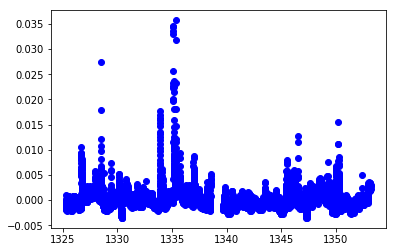

In [5]:
gmodel = Model(sa)
result = gmodel.fit(lc[:,1], t=lc[:,0], c=1.00675686e+00,a1=1.81566125e-02,a2=1.15096449e-02,a3=-3.90924741e-01,a4=-3.89635008e-01,P=4.86157211e+00,t1=1.33756897e+03,t2=1.33806734e+03,t3=1.76948608e+03,t4=1.60662441e+03)
resid=lc.copy()
resid[:,1]=lc[:,1]-result.best_fit
plt.plot(lc[:,0], resid[:,1], 'bo')
#plt.plot(lc[:,0], result.best_fit, 'r-')
plt.show()
np.savetxt('4Presiduals.txt',resid)



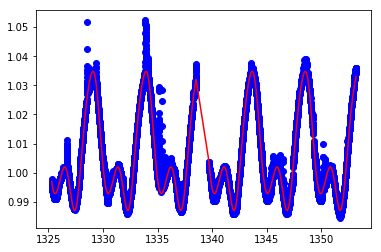

In [6]:
plt.plot(lc[:,0], lc[:,1], 'bo')
plt.plot(lc[:,0], result.best_fit, 'r-')
plt.show()


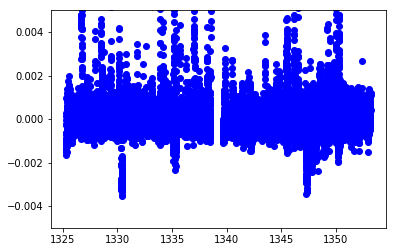

In [8]:
resid2=resid.copy()
resid2[:,1]=resid2[:,1]-medfilt(resid[:,1],201)
plt.plot(lc[:,0],resid2[:,1], 'bo')
plt.ylim(-0.005,0.005)
#plt.plot(lc[:,0], result.best_fit, 'r-')
plt.show()
np.savetxt('4P_med201_residuals.txt',resid2)